# Test Bed

## RectGrid

In [ ]:
import hybrid_astar
import numpy as np

Check instantiation

In [ ]:
temp_grid = hybrid_astar.RectGrid((10,10), (1.2,2.0), (0.1, 0.03))
print("Origin is: {}".format(temp_grid.origin))
print("Size of grid is {} x {} for wolrd of {} x {}".format(temp_grid.nrows, temp_grid.ncols, 
                                                            temp_grid.length[1], temp_grid.length[0]))
print("resolution of grid is {} in y and {} in x".format(temp_grid.resolution[1], temp_grid.resolution[0]))
print("Top left corner coordinate is {}".format(temp_grid.top_left_pos))

Test resetting origin

In [ ]:
temp_grid.setOrigin((0,0))
print("Top left corner coordinate has become {}".format(temp_grid.top_left_pos))

Test resetting the grid

In [ ]:
#reset with all ones of the same shape
new_grid = np.ones(temp_grid.grid.shape)
temp_grid.setGrid(new_grid)
#reset with different size
temp_grid.setGrid(new_grid[:-1,:-1])

Try getting and setting grid at positions, index + index retrieval via position and index.

In [ ]:
print("Tuple index of Grid @ origin: {}".format(temp_grid.getIndex(temp_grid.origin, return_type='tuple')))
print("Tuple index of Grid @ top left corner: {} ".format(temp_grid.getIndex(temp_grid.top_left_pos, 
                                                                             return_type='tuple')))
temp_pos = (temp_grid.origin[0] + temp_grid.length[0]/2.0 - temp_grid.resolution[0]/2,
            temp_grid.top_left_pos[1] + temp_grid.resolution[1]/2)
print("Tuple index of pos: {} is: {} while linear index is: {}".format(temp_pos,
    temp_grid.getIndex(temp_pos, 'tuple'), temp_grid.getIndex(temp_pos)))
temp_index = (0,temp_grid.ncols-1)
print("Position at index: {} is: {}".format(temp_index,temp_grid.getPosition(temp_index)))
#set the grid at the set position
temp_grid.setGridAtPos(temp_pos, 10)
print("Value of grid @ position: {} is: {}".format(temp_pos, temp_grid.getGridAtPos(temp_pos)))
#set the grid at the set index
temp_grid.setGridAtIndex(temp_index, 29)
print("Value of grid @ index: {} is: {}".format(temp_index, temp_grid.getGridAtIndex(temp_index)))
#check if grid is occupied 
print("Is grid occupied @pos: {}?\n{}".format(temp_pos, temp_grid.isOccupiedAtPos(temp_pos)))
print("Is grid occupied @index: {}?\n{}".format(temp_index, temp_grid.isOccupiedAtIndex(temp_index)))

## GridGraph

In [ ]:
import hybrid_astar
import math

grid graph initialisation

In [ ]:
graph = hybrid_astar.GridGraph(allow_reverse=True)

Check getting neighbors which should also help with the `getIndexAll()` method. 

In [ ]:
#top_left (would generate no neighbors in the forward direction)
rob_pose = hybrid_astar.rob_pos(x=graph.top_left_pos[0], y=graph.top_left_pos[1], theta=-math.pi/2)
print('robot position @:{}'.format(rob_pose))
for nb_ind, nb in graph.get_neighbors(rob_pose):
    print(nb_ind, nb)
#center can generate the cells in the forward direction (depending on theta)
orig_pose = hybrid_astar.rob_pos(x = graph.origin[0], y = graph.origin[1], theta=graph.bottom)
print('robot position @:{} and index:{}'.format(orig_pose, graph.getIndexAll(orig_pose, 'tuple')))
for nb_ind, nb in graph.get_neighbors(orig_pose):
    print("\t index @:{} and new position @:{}".format(nb_ind, nb))
    print("\t\t tuple of index: {}".format(graph.getIndexAll(nb, 'tuple')))


## Vanilla A-star 2D

In [335]:
import hybrid_astar
reload(hybrid_astar)
import math
import graph_display
reload(graph_display)
import numpy as np
from matplotlib import animation, rc, rcParams
%matplotlib inline
#from IPython.display import HTML

Test scenario 1: Empty cells, go from one corner to the other.

In [336]:
#set up the graphs, starting position and ending position
graph = hybrid_astar.DiscreteGrid()
start_pos = hybrid_astar.rob_pos(*graph.getPosition([graph.nrows-1, graph.ncols-1]))
goal_pos = hybrid_astar.rob_pos(*graph.getPosition([1, 1]))

In [337]:
#run A-star
came_from, cost_so_far, near_goal, raw_pos = hybrid_astar.a_star_search_optimise(graph, [hybrid_astar.Euclidean_distance],
                                                                    hybrid_astar.Euclidean_distance, hybrid_astar.xyInd,
                                                                    start_pos, goal_pos)

Number of times in loop: 419


Displaying the results from A-star

mod


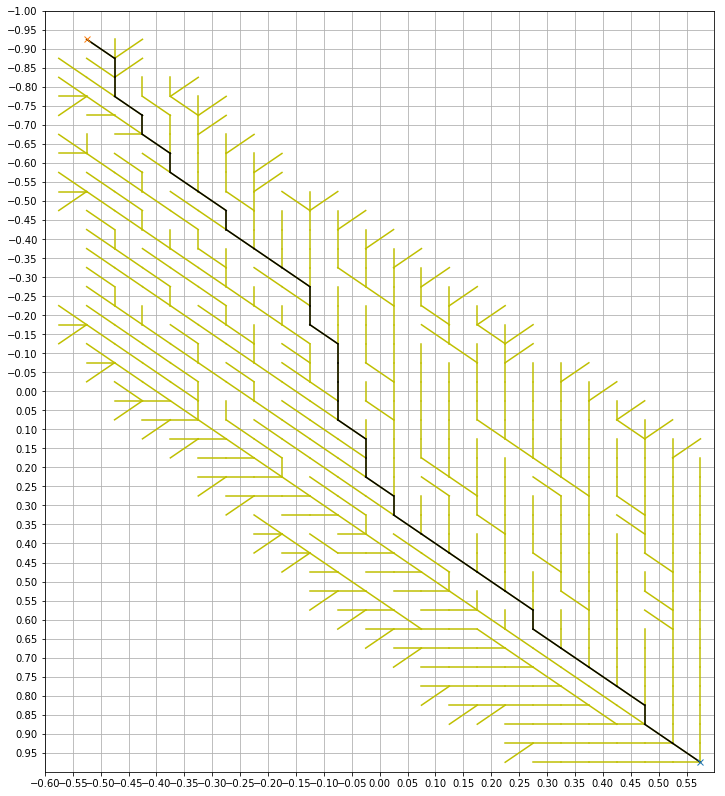

In [338]:
#show results of A star
graph_display.display_results(came_from, raw_pos, start_pos, goal_pos, near_goal, graph)

Use no heuristic, the algorithm should converge to Dijsktra where most of the cells in this case will be explored

Number of times in loop: 955
mod


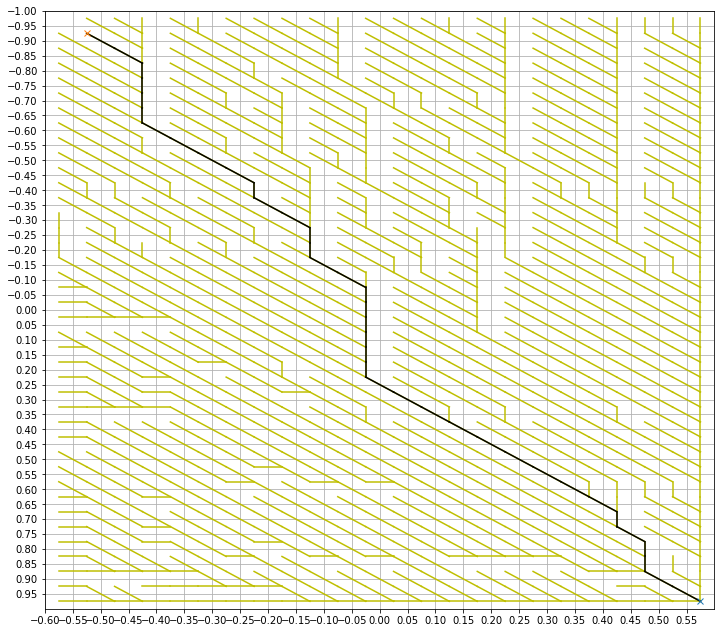

In [339]:
#run A-star
came_from, cost_so_far, near_goal, raw_pos = hybrid_astar.a_star_search_optimise(graph, [hybrid_astar.no_heuristic],
                                                                    hybrid_astar.Euclidean_distance, hybrid_astar.xyInd,
                                                                    start_pos, goal_pos)
#show results of A star
graph_display.display_results(came_from, raw_pos, start_pos, goal_pos, near_goal, graph, fig_size=(12,11))

Test scenario 2: Corridor-like environment

In [340]:
start_pos = hybrid_astar.rob_pos(*graph.getPosition([graph.nrows-1, graph.ncols-1]))
goal_pos = hybrid_astar.rob_pos(*graph.getPosition([2, 0]))
grid = np.zeros(graph.grid.shape)
grid[:-2,2] = 1
grid[-3,2:graph.ncols//2] = 1
grid[-3, graph.ncols//2+4:] = 1
graph.setGrid(grid)

Number of times in loop: 754
mod


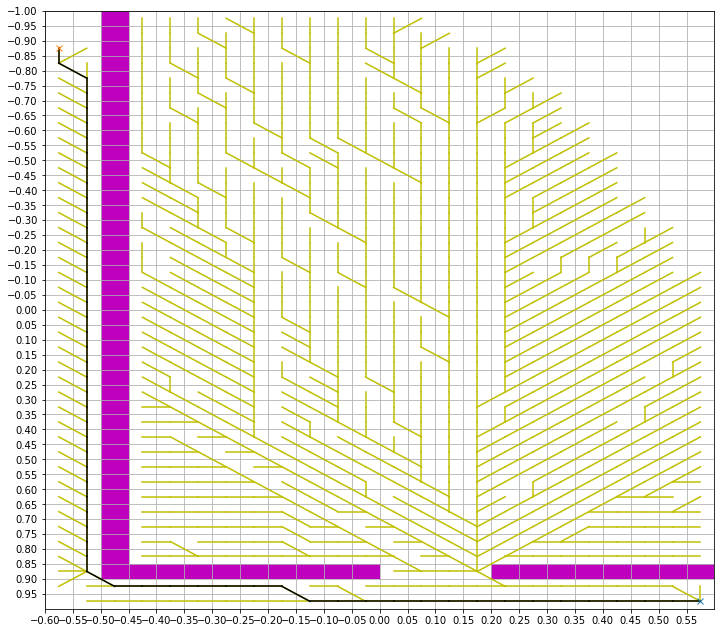

In [341]:
#run A-star
came_from, cost_so_far, near_goal, raw_pos = hybrid_astar.a_star_search_optimise(graph, [hybrid_astar.Euclidean_distance],
                                                                    hybrid_astar.Euclidean_distance, hybrid_astar.xyInd,
                                                                    start_pos, goal_pos)
#show results of A star
graph_display.display_results(came_from, raw_pos, start_pos, goal_pos, near_goal, graph, fig_size=(12,11), wall_color='m')

## Hybrid A-star

In [2]:
import hybrid_astar
import graph_display
reload(hybrid_astar)
reload(graph_display)
import math
import matplotlib.pyplot as plt
import time

Test scenario 1: Empty cells, go from one corner to the other.

In [88]:
#set up the graphs, starting position and ending position
graph = hybrid_astar.GridGraph(steering_actions=[-40,0,40], chord_l = 0.1, allow_reverse=True, resolution=[0.05,0.05])
temp_pos = graph.getPosition([graph.nrows-1, graph.ncols-1])
start_pos = hybrid_astar.rob_pos(x= temp_pos[0], y = temp_pos[1], theta=-math.pi/2)
#temp_pos = graph.getPosition([5, 5])
temp_pos = graph.getPosition(graph.getIndex(graph.origin))
goal_pos = hybrid_astar.rob_pos(x = temp_pos[0], y = temp_pos[1], theta= math.pi/2)

In [89]:
#punish the change in direction more so it prefers continuous movement
hybrid_astar.penalty_change_dir = 1*math.sqrt(graph.resolution[0]**2 + graph.resolution[1]**2) #3 cells
hybrid_astar.penalty_change_head = 1*math.sqrt(graph.resolution[0]**2 + graph.resolution[1]**2) #2 cells
#run A-star

t = time.time()

came_from, cost_so_far, near_goal, raw_pos = hybrid_astar.a_star_search_optimise(graph, 
                                                                                 [hybrid_astar.Euclidean_distance, hybrid_astar.reeds_shepp_length],
                                                                                 hybrid_astar.move_alldirs,  hybrid_astar.xyInd_headRaw,
                                                                                 start_pos, goal_pos)
elapsed = time.time() - t
print("Time taken: {}".format(elapsed))

Number of times in loop: 17078
Time taken: 5.94419193268


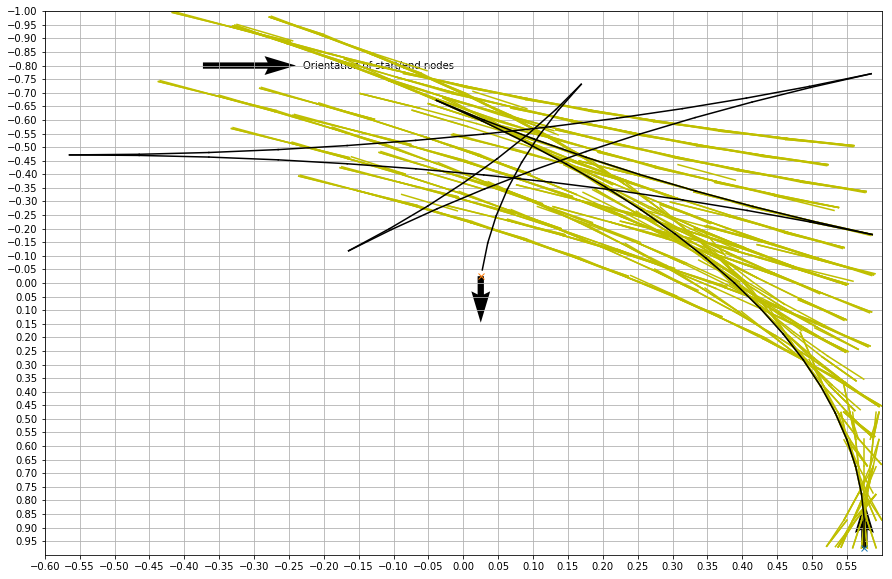

In [90]:
#show results of A star
graph_display.display_results(came_from, raw_pos, start_pos, goal_pos, near_goal, graph, 
                              fig_size=(15,10), nodes_limit=1000)

## Comparison of methods on toy example

In [54]:
import importlib
import hybrid_astar
reload(hybrid_astar)
import math
import graph_display
reload(graph_display)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

Set up the grid for dead-end scenario

In [55]:
resolution = [1,1]
length = [100,100]
discrete_graph = hybrid_astar.DiscreteGrid(length=length, resolution=resolution)
grid = np.zeros(discrete_graph.grid.shape)
grid[int(math.ceil(0.25*discrete_graph.nrows)), int(math.ceil(0.25*discrete_graph.ncols)):int(math.ceil(0.75*discrete_graph.ncols))] = 1.0
grid[int(math.ceil(0.75*discrete_graph.nrows)), int(math.ceil(0.25*discrete_graph.ncols)):int(math.ceil(0.75*discrete_graph.ncols))] = 1.0
grid[int(math.ceil(0.25*discrete_graph.nrows)):int(math.ceil(0.75*discrete_graph.nrows))+1, int(math.ceil(0.75*discrete_graph.ncols))] = 1.0
discrete_graph.setGrid(grid)
print("obstacles are at\n index ({},{}:{})\n index ({},{}:{})\n index ({}:{},{}) ".format(
    int(math.ceil(0.25*discrete_graph.nrows)), int(math.ceil(0.25*discrete_graph.ncols)), int(math.ceil(0.75*discrete_graph.ncols)),
    int(math.ceil(0.75*discrete_graph.nrows)), int(math.ceil(0.25*discrete_graph.ncols)), int(math.ceil(0.75*discrete_graph.ncols)),
    int(math.ceil(0.25*discrete_graph.nrows)), int(math.ceil(0.75*discrete_graph.nrows)), int(math.ceil(0.75*discrete_graph.ncols))))

obstacles_index_list = graph_display.obstacles_index_list(discrete_graph)

obstacles are at
 index (25,25:75)
 index (75,25:75)
 index (25:75,75) 


Chose starting and goal positions

In [5]:
#temp_pos = discrete_graph.getPosition((math.ceil(0.5*discrete_graph.nrows), math.ceil(0.125*discrete_graph.ncols)))
temp_pos = discrete_graph.getPosition((math.ceil(0.5*discrete_graph.nrows), math.ceil(0.5*discrete_graph.ncols)))
start_pos = hybrid_astar.rob_pos(x=temp_pos[0], y=temp_pos[1], theta=0)
temp_pos = discrete_graph.getPosition((math.ceil(0.5*discrete_graph.nrows), math.ceil(0.875*discrete_graph.ncols)))
goal_pos = hybrid_astar.rob_pos(x=temp_pos[0], y=temp_pos[1], theta=math.pi/2)

Creates both discrete and continuou grid for A-star, Dijsktra and Hybrid-a star technique

In [56]:
chord_l = 1.0*math.sqrt(resolution[0]**2 + resolution[1]**2)
#chord_l = math.sqrt(resolution[0]*resolution[1])
#chord_l = min(resolution[0], resolution[1])
hybrid_graph = hybrid_astar.GridGraph(length=length, resolution=resolution, steering_actions=[-10,0,10], chord_l = chord_l, allow_reverse=True)
hybrid_graph.setGrid(grid)

Get paths for Hybrid A-star

In [440]:
#Start timer
t = time.time()

#penalise change of direction more
hybrid_astar.penalty_change_dir = 10*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))
hybrid_astar.penalty_change_head = 10*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))


#parameter for precomputed path (assumes 2 times of the diagonal distance)
default_value_when_not_found = 100*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))
#precompute_obj = hybrid_astar.TwoD_AStar(default_value_when_not_found=1000)
default_func_when_not_found = hybrid_astar.reeds_shepp_length
precompute_obj = hybrid_astar.TwoD_AStar(default_func_when_not_found=None, 
                                         default_factor=5, assim_mode = 'penalty',
                                         default_value_when_not_found=default_value_when_not_found)

#run hybrid A-star
came_from_hybrid, cost_so_far_hybrid, near_goal_hybrid, raw_pos_hybrid = \
hybrid_astar.a_star_search_optimise(hybrid_graph, [hybrid_astar.Euclidean_distance, hybrid_astar.reeds_shepp_length], 
                                    hybrid_astar.move_alldirs,  hybrid_astar.xyInd_headRaw, start_pos, goal_pos, 
                                    precompute_class=precompute_obj)
path_hybrid = hybrid_astar.get_path(hybrid_graph, came_from_hybrid, near_goal_hybrid, start_pos)
print("Time taken to find path is {} seconds".format(time.time()-t))

Number of times in loop: 4471
Number of times in loop: 3921
Time taken to find path is 1.64239287376 seconds


Get paths for vanilla A-star and Dijsktra's algorithm

In [390]:
#dijkstra's algorithm
came_from_dij, cost_so_far_dij, near_goal_dij, raw_pos_dij = \
hybrid_astar.a_star_search_optimise(discrete_graph, [hybrid_astar.no_heuristic], hybrid_astar.Euclidean_distance,  
                           hybrid_astar.xyInd, start_pos, goal_pos)
path_dij = hybrid_astar.get_path(discrete_graph, came_from_dij, near_goal_dij, start_pos)

#vanilla A-star
came_from_vani, cost_so_far_vani, near_goal_vani, raw_pos_vani = \
hybrid_astar.a_star_search_optimise(discrete_graph, [hybrid_astar.Euclidean_distance], hybrid_astar.Euclidean_distance,  
                           hybrid_astar.xyInd, start_pos, goal_pos)
path_vani = hybrid_astar.get_path(discrete_graph, came_from_vani, near_goal_vani, start_pos)

Number of times in loop: 9761
Number of times in loop: 4411


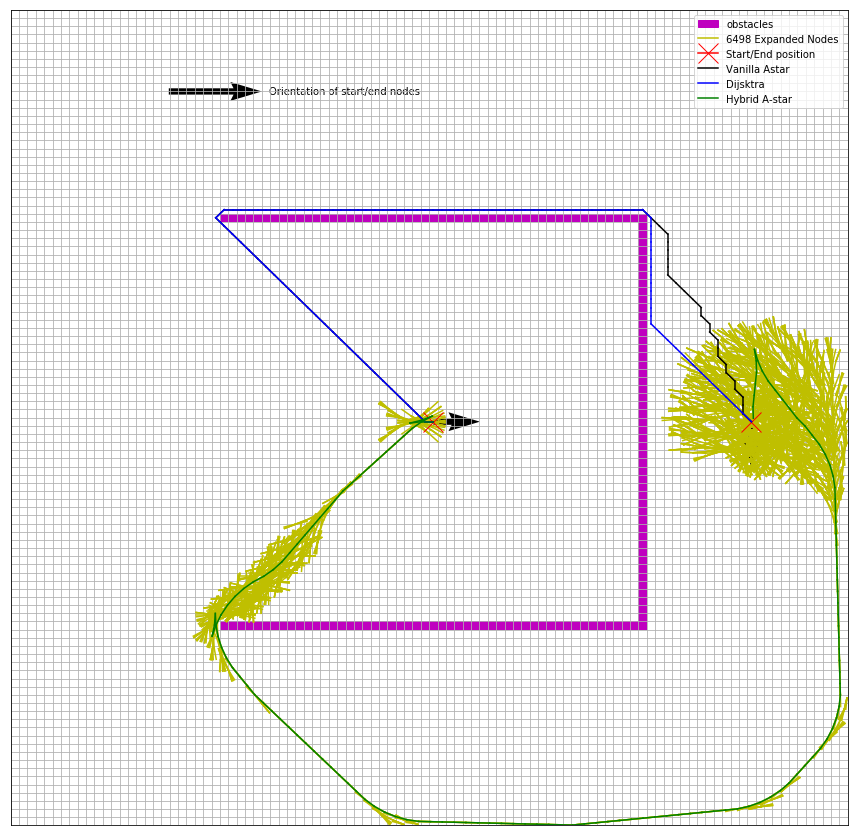

In [444]:
fig, ax = plt.subplots(1,1, figsize=[15,15])
#set up the grid
graph_display.set_up_grid(ax, discrete_graph, label='off')
#draw the obstacles
handle_obstacles = graph_display.draw_obstacles(ax, discrete_graph, 'm')
#draw expanded nodes from hybrid A-star
handle_expanded = graph_display.draw_expanded_nodes(ax, hybrid_graph, came_from_hybrid, start_pos, raw_pos_hybrid, nodes_limit=10000)
#draw expanded nodes from vanilla A-star
#handle_expanded = graph_display.draw_expanded_nodes(ax, discrete_graph, came_from_vani, start_pos, raw_pos_vani, nodes_limit=10000)
#draw the starting and goal position with orientations
handle_node = graph_display.draw_start_goal(ax, start_pos, goal_pos, color='r', markersize=20)
#draw path from vanilla A-star
handle_path_vani = graph_display.draw_path(ax, discrete_graph, came_from_vani, near_goal_vani, start_pos, path_color = 'k', label='Vanilla Astar')
#draw path from Dijsktra
handle_path_dij = graph_display.draw_path(ax, discrete_graph, came_from_dij, near_goal_dij, start_pos, path_color = 'b', label='Dijsktra')
#draw path from hybrid A-star
handle_path_hybrid = graph_display.draw_path(ax, hybrid_graph, came_from_hybrid, near_goal_hybrid, start_pos, path_color = 'g', label='Hybrid A-star')
#legend for the graphical objects
ax.legend(handles=[handle_obstacles, handle_expanded, handle_node, handle_path_vani, handle_path_dij, handle_path_hybrid])

Create and run the video of the node expansion of the hybrid A star which produces the path such as above

Number of times in loop: 4471


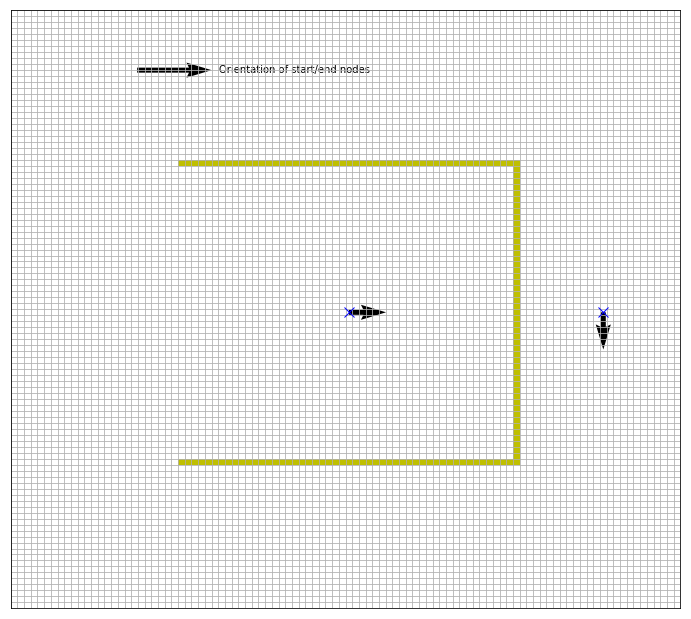

In [14]:
from matplotlib import rcParams
from IPython.display import HTML
#penalise change of direction more
hybrid_astar.penalty_change_dir = 10*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))
hybrid_astar.penalty_change_head = 10*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))


#parameter for precomputed path (assumes 2 times of the diagonal distance)
default_value_when_not_found = 100*(math.sqrt(hybrid_graph.resolution[0]**2 + hybrid_graph.resolution[1]**2))
#precompute_obj = hybrid_astar.TwoD_AStar(default_value_when_not_found=1000)
default_func_when_not_found = hybrid_astar.reeds_shepp_length
precompute_obj = hybrid_astar.TwoD_AStar(default_func_when_not_found=None, 
                                         default_factor=5, assim_mode = 'penalty',
                                         default_value_when_not_found=default_value_when_not_found)

live_obj = graph_display.LiveUpdate(start_pos, goal_pos, hybrid_graph, [hybrid_astar.Euclidean_distance, hybrid_astar.reeds_shepp_length],
                          hybrid_astar.move_alldirs, hybrid_astar.xyInd_headRaw, duration=1, fig_size=(12,11), use_optimise=False,
                          precompute_class = precompute_obj, display=False)
#HTML(live_obj.anim.to_jshtml())

In [18]:
rcParams['animation.embed_limit'] = 512*4
#HTML(live_obj.anim.to_html5_video())
HTML(live_obj.anim.to_jshtml())

KeyboardInterrupt: 

Rerun the vanilla A-star and Dijsktra when the starting and ending nodes are swapped.

In [266]:
#dijkstra's algorithm
came_from_dij, cost_so_far_dij, near_goal_dij, raw_pos_dij = \
hybrid_astar.a_star_search_optimise(discrete_graph, [hybrid_astar.no_heuristic], hybrid_astar.Euclidean_distance,  
                           hybrid_astar.xyInd, goal_pos, start_pos)
path_dij = hybrid_astar.get_path(discrete_graph, came_from_dij, near_goal_dij, goal_pos)

#vanilla A-star
came_from_vani, cost_so_far_vani, near_goal_vani, raw_pos_vani = \
hybrid_astar.a_star_search_optimise(discrete_graph, [hybrid_astar.Euclidean_distance], hybrid_astar.Euclidean_distance,  
                           hybrid_astar.xyInd, goal_pos, start_pos)
path_vani = hybrid_astar.get_path(discrete_graph, came_from_vani, near_goal_vani, goal_pos)

Number of times in loop: 8897
Number of times in loop: 4471


Produce similar image to above. The objective here is look out for the expanded nodes since these are used as heuristics for the hybrid A-star.

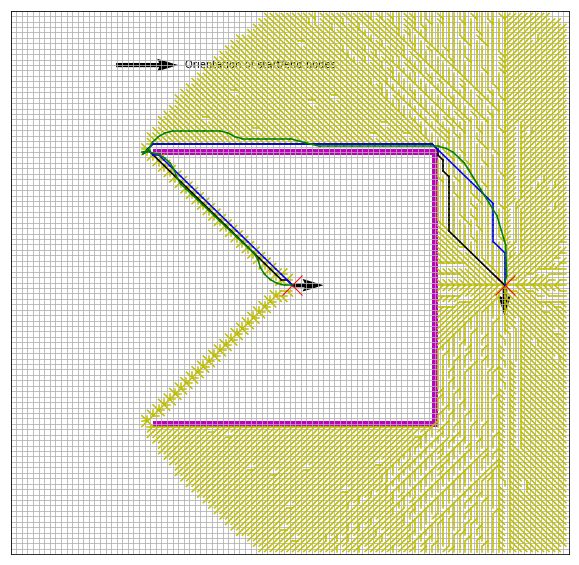

In [267]:
fig, ax = plt.subplots(1,1, figsize=[10,10])
#set up the grid
graph_display.set_up_grid(ax, discrete_graph, label='off')
#draw the obstacles
handle_obstacles = graph_display.draw_obstacles(ax, discrete_graph, 'm')
#draw expanded nodes from vanilla A-star
handle_expanded = graph_display.draw_expanded_nodes(ax, discrete_graph, came_from_vani, goal_pos, raw_pos_vani, nodes_limit=100000)
#draw expanded nodes from Dijsktra
#handle_expanded = graph_display.draw_expanded_nodes(ax, discrete_graph, came_from_dij, goal_pos, raw_pos_dij, nodes_limit=10000)
#draw the starting and goal position with orientations
handle_node = graph_display.draw_start_goal(ax, start_pos, goal_pos, color='r', markersize=20)
#draw path from vanilla A-star
handle_path_vani = graph_display.draw_path(ax, discrete_graph, came_from_vani, near_goal_vani, goal_pos, path_color = 'k', label='Vanilla Astar')
#draw path from Dijsktra
handle_path_dij = graph_display.draw_path(ax, discrete_graph, came_from_dij, near_goal_dij, goal_pos, path_color = 'b', label='Dijsktra')
#draw path from hybrid A-star
handle_path_hybrid = graph_display.draw_path(ax, hybrid_graph, came_from_hybrid, near_goal_hybrid, start_pos, path_color = 'g', label='Hybrid A-star')
#legend for the graphical objects
#ax.legend(handles=[handle_obstacles, handle_expanded, handle_node, handle_path_vani, handle_path_dij, handle_path_hybrid])